
Predicted House Price: $1,047,747.70


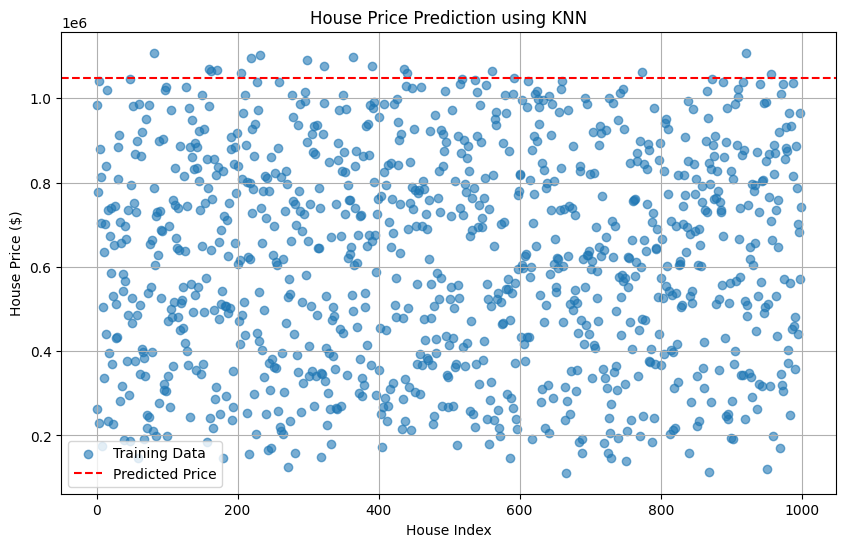

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/house_price_regression_dataset.csv')

# Normalize features
def normalize(df):
    return (df - df.min()) / (df.max() - df.min())

features = ['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
            'Lot_Size', 'Garage_Size', 'Neighborhood_Quality']
target = 'House_Price'

df_normalized = normalize(df[features])
df_normalized[target] = df[target]  # append target for reference

# KNN Regression with explicit Euclidean distance formula
def euclidean_distance(point1, point2):
    dist = 0
    for i in range(len(point1)):
        dist += (point1[i] - point2[i]) ** 2
    return np.sqrt(dist)

def knn_predict(X_train, y_train, x_input, k=3):
    distances = []
    for i in range(len(X_train)):
        # Explicit Euclidean distance
        dist = euclidean_distance(list(X_train.iloc[i]), x_input)
        distances.append((dist, y_train.iloc[i]))

    distances.sort(key=lambda x: x[0])
    nearest_neighbors = distances[:k]

    # Mean of K nearest neighbors
    predicted_value = np.mean([neighbor[1] for neighbor in nearest_neighbors])
    return predicted_value


new_input = {
    'Square_Footage': 25000,
    'Num_Bedrooms': 4,
    'Num_Bathrooms': 3,
    'Year_Built': 2015,
    'Lot_Size': 0.5,
    'Garage_Size': 2,
    'Neighborhood_Quality': 8
}

# Normalize new input
new_input_normalized = []
for feature in features:
    norm_value = (new_input[feature] - df[feature].min()) / (df[feature].max() - df[feature].min())
    new_input_normalized.append(norm_value)

# Predict using KNN
predicted_price = knn_predict(df_normalized[features], df[target], new_input_normalized, k=3)
print(f"\nPredicted House Price: ${predicted_price:,.2f}")

# ----------- Visualization ------------------
plt.figure(figsize=(10,6))
plt.scatter(range(len(df)), df['House_Price'], label="Training Data", alpha=0.6)
plt.axhline(y=predicted_price, color='red', linestyle='--', label='Predicted Price')
plt.title('House Price Prediction using KNN')
plt.xlabel('House Index')
plt.ylabel('House Price ($)')
plt.legend()
plt.grid(True)
plt.show()



Enter values for a new data point:
Feature 1: 5.5
Feature 2: 2.6
Feature 3: 4.2
Feature 4: 1.1

Predicted Class: versicolor


<ipython-input-6-0f8f08f98b6e>:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(unique_classes))


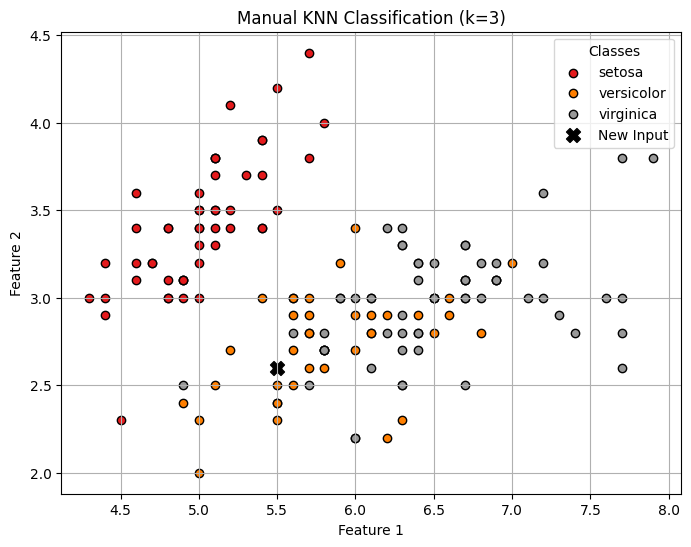

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

# Load dataset
df = pd.read_csv('/content/iris.csv')  # Replace with your dataset

# Separate features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# For plotting (first 2 features only)
X_plot = X[:, :2]

# Train/test split (70% train, 30% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ---- USER INPUT SECTION ----
print("\nEnter values for a new data point:")
feature1 = float(input("Feature 1: "))
feature2 = float(input("Feature 2: "))
feature3 = float(input("Feature 3: "))
feature4 = float(input("Feature 4: "))

new_input = np.array([feature1, feature2, feature3, feature4])

# ---- MANUAL KNN IMPLEMENTATION ----
k = 3  # Number of neighbors

# Calculate Euclidean distance from new input to all training points
distances = []
for i in range(len(X_train)):
    dist = np.sqrt(np.sum((X_train[i] - new_input) ** 2))
    distances.append((dist, y_train[i]))

# Sort by distance
sorted_neighbors = sorted(distances, key=lambda x: x[0])

# Pick k nearest neighbors
k_neighbors = sorted_neighbors[:k]

# Perform majority vote
k_labels = [label for _, label in k_neighbors]
predicted_label = Counter(k_labels).most_common(1)[0][0]

print(f"\nPredicted Class: {predicted_label}")

# ---- PLOT DATA + NEW POINT (Only First Two Features) ----
plt.figure(figsize=(8, 6))
unique_classes = np.unique(y)
colors = plt.cm.get_cmap('Set1', len(unique_classes))

# Plot existing data
for idx, cls in enumerate(unique_classes):
    plt.scatter(
        X_plot[y == cls, 0], X_plot[y == cls, 1],
        color=colors(idx),
        label=str(cls),
        edgecolors='k'
    )

# Plot new input point (first two features only)
plt.scatter(feature1, feature2, color='black', marker='X', s=100, label='New Input')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Manual KNN Classification (k=3)')
plt.legend(title="Classes")
plt.grid(True)
plt.show()